In [1]:
import numpy as np

import pyiron_core as pc

In [2]:
@pc.as_function_node
def linspace(x_min: int = 0, x_max: float = 2 * np.pi, n: int = 50):

    vec = np.linspace(x_min, x_max, n)
    return vec


@pc.as_function_node
def sin(x):
    import numpy as np

    vec = np.sin(x)
    return vec


@pc.as_function_node("plot")
def plot(x, y):
    import matplotlib.pylab as plt

    plt.plot(x, y)
    return plt.show()

In [3]:
wf = pc.Workflow("my_first_workflow")

wf.x = linspace(x_min=-2)
wf.sin = sin(x=wf.x)
wf.plot = plot(x=wf.x, y=wf.sin.outputs.vec)

In [4]:
wf

pyiron_core.pyiron_workflow instance: 
from pyiron_core.pyiron_workflow import Workflow
import pyiron_nodes

wf = Workflow("my_first_workflow")

wf.x = __main__.linspace(x_min=-2)
wf.sin = __main__.sin(x=wf.x)
wf.plot = __main__.plot(x=wf.x, y=wf.sin)

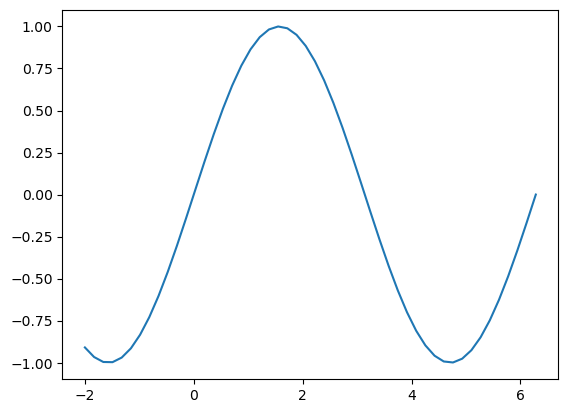

In [5]:
wf.run()

In [6]:
widget = pc.PyironFlow([wf])
widget.gui

In the GUI, we can transition from a `Node`/`Workflow` representation to a `Graph` representation.
The GUI lets us group nodes together, and pull on individual nodes.
We can duplicate this at the code level as follows:

In [7]:
from pyiron_core import nodes
from pyiron_core.pyiron_workflow.api import graph as base

wf = pc.Workflow("group_returns")
wf.m = nodes.math.Linspace(0,1,2)
g = base.get_full_graph_from_wf(wf)
g = base.create_group(g, [0], label="subgraph")
base.pull_node(g, "subgraph")

labels ['m__num_points']
inp:  m num_points
GraphEdge(source='va_i_subgraph__m__num_points', target='m', sourceHandle='x', targetHandle='num_points')
labels ['m__linspace']
node:  m GraphNode(id='m', import_path='pyiron_core.pyiron_nodes.math.Linspace', label='m', parent_id='subgraph', level=1, node=<pyiron_core.pyiron_workflow.simple_workflow.Node object at 0x158b9bec0>, graph=None, node_type='node', widget_type='customNode', expanded=False)
node:  subgraph GraphNode(id='subgraph', import_path=None, label='subgraph', parent_id=None, level=0, node=<pyiron_core.pyiron_workflow.simple_workflow.Node object at 0x158b6a3f0>, graph=Graph(id=None, label='subgraph', root_node=None, nodes=NestedDict({'m': GraphNode(id='m', import_path='pyiron_core.pyiron_nodes.math.Linspace', label='m', parent_id=None, level=0, node=<pyiron_core.pyiron_workflow.simple_workflow.Node object at 0x158b9bec0>, graph=None, node_type='node', widget_type='customNode', expanded=False)}), edges=[], graph={}), node_type='

array([0., 1.])